# Make corona mask classifier

In [2]:
images=[] # stores all images of the dataset
labels=[] # stores the labels of each image of the dataset

In [3]:
import os

In [4]:
os.listdir("C:/Users/Lenovo/OneDrive/Documents/dataset/") # UPDATE THIS LATER

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Lenovo/OneDrive/Documents/dataset/'

In [5]:
import cv2

In [6]:
for i in ['without_mask', 'with_mask']: # i iterates over the two folders names
    imageNameList=os.listdir("C:/Users/Lenovo/OneDrive/Documents/dataset/" + str(i)) # UPDATE THIS LATER # enters one of the folders of dataset
    for fileName in imageNameList: # filename iterates over all image files inside i folder
        Image=cv2.imread("C:/Users/Lenovo/OneDrive/Documents/dataset/" + str(i) + "/" + str(fileName)) # stores the location of each image
        try: # handles exceptions of resizing 
            gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY) # converts image to grayscale
            Image=cv2.resize(gray,(100,100)) # resizes image to 100x100 pixel
            images.append(Image) # makes a list of edited images
            if i=="without_mask": 
                labels.append(0) # appends the label value of each image of without_mask folder
            else:
                labels.append(1) # appends the label value of each image of with_mask folder
        except:
            pass # when we don't want to have any code in a block we write pass
    print("Inside folder ", i) # prints folder name when done appending images and labels from folder i
        
        

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Lenovo/OneDrive/Documents/dataset/without_mask'

In [7]:
import numpy as np

In [8]:
images=np.array(images) # converts the image list to an array
labels=np.array(labels) # converts the labels lis to an array

In [9]:
from sklearn.model_selection import train_test_split # this will help us split the images in training and testing of features and targets

In [10]:
train_features,test_features,train_target,test_target=train_test_split(images,labels,test_size=0.2)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [11]:
def preprocessing(img): # converts the intesity value of pixel into probability format
    img=img/255
    return img

In [12]:
train_features=np.array(list(map(preprocessing,train_features))) # makes an array with the image pixel intensity values stored in probabalistic form

NameError: name 'train_features' is not defined

In [13]:
train_features=train_features.reshape(train_features.shape[0], train_features.shape[1],train_features.shape[2],1) # setting the dimensions of the training features

NameError: name 'train_features' is not defined

In [14]:
test_features=np.array(list(map(preprocessing,test_features))) # setting the dimensions of the testing features

NameError: name 'test_features' is not defined

In [15]:
from keras.preprocessing.image import ImageDataGenerator # will generate more types of images for our neural network to train on

In [16]:
dataGenerator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10) # changes to image

In [17]:
dataGenerator.fit(train_features)

NameError: name 'train_features' is not defined

In [18]:
batches=dataGenerator.flow(train_features,train_target,batch_size=20)

NameError: name 'train_features' is not defined

In [19]:
X_batch,y_batch=next(batches)

NameError: name 'batches' is not defined

In [20]:
import matplotlib.pyplot as plt

NameError: name 'X_batch' is not defined

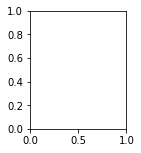

In [21]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_batch[i].reshape(100,100))
plt.show()

In [22]:
from keras.utils import to_categorical

In [23]:
train_target=to_categorical(train_target)

NameError: name 'train_target' is not defined

In [24]:
test_target=to_categorical(test_target)

NameError: name 'test_target' is not defined

In [25]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout

In [26]:
model=Sequential()
model.add(Conv2D(60,(5,5),activation="relu",input_shape=(100, 100, 1)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(Conv2D(30,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [27]:
from keras.optimizers import Adam

In [28]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [29]:
model.fit_generator(dataGenerator.flow(train_features,train_target,batch_size=20),epochs=20)

NameError: name 'train_features' is not defined

# neural network fitted and done now we add the camera part

In [30]:
import numpy as np
import cv2

 

def getClassName(classNo):
    if   classNo == 0: return 'without_mask'
    elif classNo == 1: return 'with_mask'

In [ ]:
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    success,imgOriginal=cap.read()
    img=np.asarray(imgOriginal)
    img=cv2.resize(img,(32,32))
    img=preprocessing(img)
    cv2.imshow("Processed Image",img)
    img=img.reshape(1,32,32,1)
    cv2.putText(imgOriginal,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOriginal,"Probability: ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    predictions=model.predict(img)
    classIndex=model.predict_classes(img)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(imgOriginal,str(classIndex) + " "+ str(getCalssName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgOriginal,str(round(probabilityValue*100,2)) + "%",(120,150),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1)==113:
        cv2.destroyAllWindows()
        break